https://docs.python.org/3/library/functools.html

# functools - cache

## @cache

### 例子: download web pages 

In [76]:
import time
import urllib.error
import urllib.request

from functools import lru_cache

@lru_cache(maxsize=24)
def get_webpage(module):
    """
    Gets the specified Python module web page
    """
    webpage = f"https://docs.python.org/3/library/{module}.html"
    try:
        with urllib.request.urlopen(webpage) as request:
            return request.read()
    except urllib.error.HTTPError:
        return None
    
modules = ["functools", "os", "sys", "os"]
for module in modules:
    start = time.time()
    page = get_webpage(module)
    end = time.time()
    if page:
        print(f"{module} module download in {end - start: .20f} seconds")
    

functools module download in  1.64257192611694335938 seconds
os module download in  1.11492609977722167969 seconds
sys module download in  0.83173084259033203125 seconds
os module download in  0.00000309944152832031 seconds


### 例子，对比 factorial

In [83]:
from functools import cache

@cache
def factorial(n):
    return n * factorial(n-1) if n else 1

In [85]:
factorial(10) # no previously cached result, makes 11 recursive calls

3628800

In [86]:
factorial(5) # just looks up cached value result

120

In [87]:
factorial(15) # make five new recursive calls, the other 10 are cached

1307674368000

### 例子，对比 fabonacci

#### before: no cache

In [103]:
import timeit

def fibonacci(n):
    if n<2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
timer = timeit.Timer("fibonacci(35)", "from __main__ import fibonacci")
time_used_before = timer.timeit(10)
print(f"{time_used_before:.10f}")

9.8372385830


#### after: using cache, 快了 百万倍以上

In [104]:
from functools import cache
import timeit

@cache
def fibonacci(n):
    if n<2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
timer = timeit.Timer("fibonacci(35)", "from __main__ import fibonacci")
time_used_after = timer.timeit(10)
print(f"{time_used_after:.10f}")
print(f"{time_used_before/time_used_after}")

0.0000082500
1192392.4147507015


## @lru_cache(maxside=n), @cached_property

###  例子

In [97]:
from functools import cached_property, lru_cache
class User:
    def __init__(self, name):
        self.name = name
    
    @property
    def first_name(self):
        return self.name.split()[0]
    
    @cached_property
    def last_name(self):
        last_name = self.name.split()[1]
        print(f"last name is {last_name}")
        return last_name
    
    @lru_cache(maxsize=2)
    def job(self, jobname):
        print(f"job is {jobname}")
        return jobname

In [13]:
user = User("Bob Dyllen")

In [14]:
user.first_name

'Bob'

In [15]:
user.last_name

last name is Dyllen


'Dyllen'

In [16]:
user.last_name

'Dyllen'

In [17]:
user.job("job1")

job is job1


'job1'

In [18]:
user.job("job2")

job is job2


'job2'

In [19]:
user.job("job1")

'job1'

In [20]:
user.job("job2")

'job2'

In [21]:
user.job("job3")

job is job3


'job3'

In [22]:
user.job("job1")

job is job1


'job1'

# functools - partial

## partial()

### 首先学习下面的参数方法：第一个是位置参数，第二个和第三个必须输入关键字参数

In [29]:
def example_func(arg1, *, arg2, arg3):
    print(f"arg1:{arg1}, arg2:{arg2}, arg3:{arg3}")

In [25]:
example_func(100)

TypeError: example_func() missing 2 required keyword-only arguments: 'arg2' and 'arg3'

In [27]:
example_func(100, arg2 = 101)

TypeError: example_func() missing 1 required keyword-only argument: 'arg3'

In [28]:
example_func(100, arg2 = 101, arg3 = 102)

arg1:100, arg2:101, arg3:102


### 使用partial

In [35]:
from functools import partial
def example_func(arg1, *, arg2, arg3):
    print(f"arg1:{arg1}, arg2:{arg2}, arg3:{arg3}")

f1 = partial(example_func, 100)
f2 = partial(example_func, 100, arg2=101)
f3 = partial(example_func, 100, arg2=101, arg3=102)

In [37]:
f1(arg2=101, arg3=102)

arg1:100, arg2:101, arg3:102


In [38]:
f2(arg3=102)

arg1:100, arg2:101, arg3:102


In [40]:
f3

functools.partial(<function example_func at 0x1265fcf40>, 100, arg2=101, arg3=102)

## partialmethod

# functools - dispatch

## @singledispatch

In [42]:
from functools import singledispatch
users = [("Jack", 12, 78.5),
         ("Mike", 13, 55),
         ("Jenny", 14, 67),
         ("Linus", 13, 67)]

@singledispatch
def find_user(name: str):
    return [x for x in users if x[0] == name]

@find_user.register
def _(age: int):
    return [x for x in users if x[1] == age]    

@find_user.register
def _(score: float):
    return [x for x in users if x[2] == score]    


In [44]:
print(find_user("Jack"))

[('Jack', 12, 78.5)]


In [45]:
print(find_user(13))

[('Mike', 13, 55), ('Linus', 13, 67)]


In [47]:
print(find_user(67.0))

[('Jenny', 14, 67), ('Linus', 13, 67)]


## @singledispatchmethod

In [49]:
from functools import singledispatchmethod
class OrderTool:
    
    @singledispatchmethod
    def get_order(self, arg):
        return NotImplementedError(f"failed get by {arg}")
    
    @get_order.register
    def _(self, _id: int):
        print(f"get the order by id:{_id}")
        
    @get_order.register
    def _(self, _order_no: str):
                print(f"get the order by order no:{_order_no}")

In [50]:
OrderTool().get_order(1)

get the order by id:1


In [51]:
OrderTool().get_order("123")

get the order by order no:123


In [52]:
OrderTool().get_order([2])

NotImplementedError('failed get by [2]')

## ***reduce()***

In [53]:
from functools import reduce
origin = range(1, 6)
after_reduce = reduce(lambda a, b: a * b, origin)
print(after_reduce)

120


In [54]:
from functools import reduce
from operator import mul
origin = range(1, 6)
after_reduce = reduce(mul, origin)

print(after_reduce)

120


In [55]:
from functools import reduce
def factorial(n):
    return reduce(lambda a, b: a*b, range(1, n+1))

print(factorial(5))

120


In [56]:
def factorial(n):
    return eval("*".join([str(i) for i in range(1, n+1)]))

print(factorial(5))

120


In [57]:
def factorial(n):
    return 1 if n==0 else n*factorial(n-1)

print(factorial(5))

120


# functools - wraps

## @wraps

## update_wrapper "\__doc\__"

# others

## cmp_to_key

https://www.gairuo.com/p/python-cmp-to-key

https://www.bilibili.com/video/BV1WD4y1c73F/?spm_id_from=333.999.0.0&vd_source=0d986c6f0f9a2eada69b2f35038ab54c

Transform an old-style comparison function to a key function
将老旧风格的对比方法，转变为关键字风格
Used with tools that accept key functionsmin(),max(),heapq.nlargest(),heapq.nsmallest(),itertools
(such as sorted()
这个cmp_to_key方法，服务于的方法有sorted方法，min()方法，max()方法等，这些方法都会接受-nnn
This function is primarily used as a transition tool for programsboing converted from Python 2 which supported the use of comparison functions
1. python2支持比较方法，现在不皮持了。
需要将对比方法转化为关键方法。
2. com_to_key 就是将对比方法转为关键方法、

### 例子1

In [62]:
from functools import cache

@cache
def factorial(n):
    return n*factorial(n-1) if n else 1

In [64]:
factorial(10) # no previous cached result, makes 11 recursive calls

3628800

In [63]:
factorial(5) # just looks up cached value result

120

In [65]:
factorial(15) # makes five new recursive calls, the other 10 are cached

1307674368000

### 例子2 对比效果

In [70]:
import timeit

def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
timer = timeit.Timer("fibonacci(35)", "from __main__ import fibonacci")
print(f"{timer.timeit(10): .10f}")

 9.8558970830


In [71]:
import timeit
from functools import cache

@cache
def fibonacci(n):
    if n < 2:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)
    
timer = timeit.Timer("fibonacci(35)", "from __main__ import fibonacci")
print(f"{timer.timeit(10): .10f}")

 0.0000218330


## @total_ordering

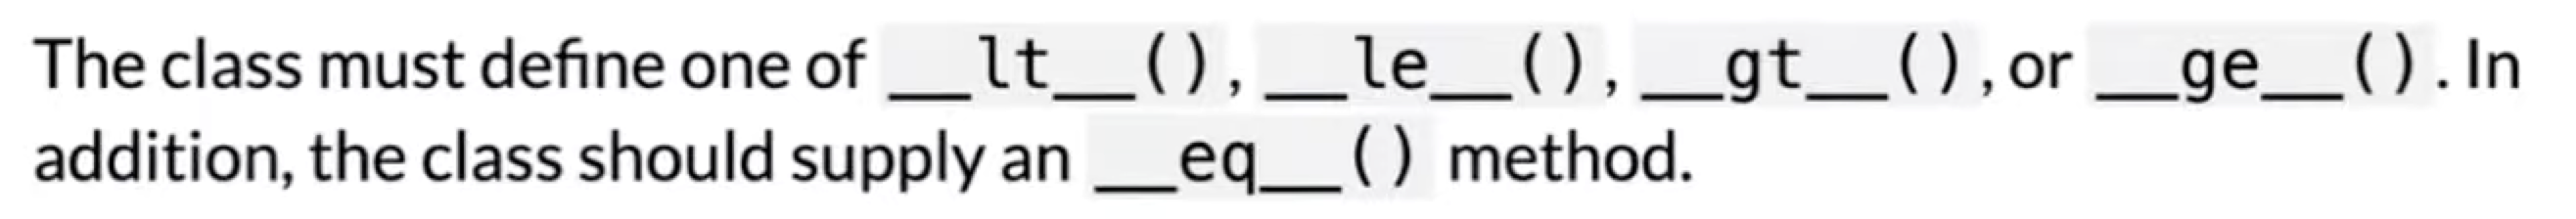

In [79]:
from functools import total_ordering

@total_ordering
class Number:
    
    def __init__(self, number):
        self.number = number
        
    def __lt__(self, other):
        return self.number < other.number
    
    def __eq__(self, other):
        return self.number == other.number

In [81]:
x = Number(5)
y = Number(10)
print(x < y) # __lt__
print(x <= y) # __le__
print(x == y) # __eq__
print(x != y) # not __eq__
print(x > y) # __gt__
print(x >= y) # __ge__

True
True
False
True
False
False
